# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Tiani Ayu Lestari]
- **Email:** [tianiayulestari@gmail.com]
- **ID Dicoding:** [tiani_ayu]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan waktu penggunaan sepeda paling tinggi dalam sehari?(analisis jumlah peminjaman berdasarkan jam (hr) untuk melihat jam-jam sibuk)
- Pertanyaan 2 : Bagaimana perbandingan jumlah peminjaman oleh pengguna terdaftar (registered) di banding pengguna tidak terdaftar (casual). (perbandingan registered vs casual sepanjang tahun)

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari dua dataset yang disediakan yaitu hour.csv dan day.csv merepresentasikan baris data sesuai dengan nama datasetnya yaitu per Jam dan per Hari
- Perbedaan kolom dari dua dataset tersebut, terdapat tambahan kolom jam (hr) pada dataset hour.csv

### Assessing Data

In [7]:
#Menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Hasil diatas menunjukan bahwa terdapat kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai data datetime, bukan object. 

In [8]:
#Menampilkan informasi jumlah missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Periksa Duplikasi Data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
#Periksa Parameter Statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
#Menilai Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil diatas menunjukan bahwa terdapat kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai data datetime, bukan object. 

In [12]:
#Menampilkan missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
#Periksa Duplikasi Data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
#Periksa Parameter Statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- terdapat kesalahan tipe data pada dataset hour.csv dan day.csv di kolom dteday tertera onject yang seharusnya datetime

### Cleaning Data

In [15]:
#Membersihkan Data hour_df
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
#Cek setelah dibersihkan 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
#Membersihkan Data day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [18]:
#Cek setelah dibersihkan 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah data dibersihkan, yang sebelumnya tipe data pada kolom dteday adalah object sudah menjadi datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik diatas dapat memperoleh informasi total jumlah waktu dalam jam peminjaman bike 17379 jam, pada kolom hr memiliki rentang nilai jam min 0.00 dan max 23.00, dimana standar deviasi sebesar 6.91 yang menunujukan bahwa nilai jam peminjaman sepeda sekitar rata-rata (mean) 11.55 mengindikasikan bahwa peminjaman cenderung lebih sering terjadi sekitar tengah hari hingga sebelum malam hari.

In [20]:
hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
})

cnt                                 
       sum        mean  max min         std
hr                                         
0    39130   53.898072  283   2   42.307910
1    24164   33.375691  168   1   33.538727
2    16352   22.869930  132   1   26.578642
3     8174   11.727403   79   1   13.239190
4     4428    6.352941   28   1    4.143818
5    14261   19.889819   66   1   13.200765
6    55132   76.044138  213   1   55.084348
7   154171  212.064649  596   1  161.441936
8   261001  359.011004  839   5  235.189285
9   159438  219.309491  426  14   93.703458
10  126257  173.668501  539   8  102.205413
11  151320  208.143054  663  10  127.495536
12  184414  253.315934  776   3  145.081134
13  184919  253.661180  760  11  148.107657
14  175652  240.949246  750  12  147.271574
15  183149  251.233196  750   7  144.632541
16  227748  311.983562  783  11  148.682618
17  336860  461.452055  976  15  232.656611
18  309772  425.510989  977  23  224.639304
19  226789  311.523352  743  11  161.050359
20  164550  226.030220  567  11  119.670164
21  125445  172.314560  584   6   89.788893
22   95612  131.335165  502   9   69.937782
23   63941   87.831044  256   2   50.846889

Berdasarkan hasilk diatas, dapat diketahui bahwa pelanggan mulai melonjak pada pukul 7.00 dan terus meningkat hingga pukul 8.00. Setelah itu mulai menurun secara bertahap hingga siang hari dan mengalami lonjakan signifikan kembali pada pukul 17.00 hingga pukul 19.00 yang berkaitan dengan mobilitas pekerja di jam kerja. Di luar jam sibuk, peminjam cenderung rendah, terutama dini hari.

In [21]:
#Menampilkan hari apa yang memiliki jumlah Peminjam tertinggi
hour_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

In [22]:
#Peminjaman pada Hari Libur banding Hari Biasa
hour_df.groupby("holiday").cnt.sum().sort_values(ascending=False)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

In [23]:
#Peminjaman Berdasarkan hari kerja banding akhir pekan
hour_df.groupby("workingday").cnt.sum().sort_values(ascending=False)

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64

### Eksplore Data day_df

In [24]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan hasil tersebut rata-rata peminjam bike sebesar 4504 bike dengan minimal peminjam 22 bike dan max peminjam 8714 bike

In [25]:
day_df.groupby("dteday",as_index=False).agg({
    "registered": ["sum", "mean"],
    "casual": ["sum", "mean"]
})

dteday registered         casual       
                      sum    mean    sum   mean
0   2011-01-01        654   654.0    331  331.0
1   2011-01-02        670   670.0    131  131.0
2   2011-01-03       1229  1229.0    120  120.0
3   2011-01-04       1454  1454.0    108  108.0
4   2011-01-05       1518  1518.0     82   82.0
..         ...        ...     ...    ...    ...
726 2012-12-27       1867  1867.0    247  247.0
727 2012-12-28       2451  2451.0    644  644.0
728 2012-12-29       1182  1182.0    159  159.0
729 2012-12-30       1432  1432.0    364  364.0
730 2012-12-31       2290  2290.0    439  439.0

[731 rows x 5 columns]

### Explore Data hour_df dan day_df

In [26]:
hour_df["status"] = hour_df["cnt"].apply(lambda x: 
    "Rendah" if x <=hour_df["cnt"].mean() else "Tinggi")

hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
1656,1657,2011-03-14,1,0,3,14,0,1,1,2,0.38,0.3939,0.34,0.0000,27,52,79,Rendah
4036,4037,2011-06-22,3,0,6,2,0,3,1,1,0.66,0.6061,0.78,0.0000,2,5,7,Rendah
3939,3940,2011-06-18,2,0,6,1,0,6,0,1,0.62,0.5758,0.83,0.1045,15,80,95,Rendah
2130,2131,2011-04-03,2,0,4,15,0,0,0,2,0.46,0.4545,0.33,0.0000,174,118,292,Tinggi
14438,14439,2012-08-29,3,1,8,19,0,3,1,1,0.70,0.6515,0.54,0.1940,120,523,643,Tinggi


In [27]:
hour_df.groupby(by="status").instant.count()

status
Rendah    10444
Tinggi     6935
Name: instant, dtype: int64

In [28]:
day_df["status"] = day_df["cnt"].apply(lambda x: 
    "Rendah" if x <=day_df["cnt"].mean() else "Tinggi")

day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
185,186,2011-07-05,3,0,7,0,2,1,1,0.746667,0.696338,0.590417,0.126258,1031,3634,4665,Tinggi
584,585,2012-08-07,3,1,8,0,2,1,2,0.735833,0.697621,0.703750,0.116908,1278,5995,7273,Tinggi
521,522,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001,Tinggi
624,625,2012-09-16,3,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,2166,5167,7333,Tinggi
295,296,2011-10-23,4,0,10,0,0,0,1,0.421667,0.422333,0.741250,0.099513,1619,2762,4381,Rendah


In [29]:
day_df.groupby(by="status").instant.count()

status
Rendah    359
Tinggi    372
Name: instant, dtype: int64

**Insight:**
- Jumlah pinjaman berdasarkan waktu hour_df dan day_df lonjakan peminjam terjadi pada jam sibuk yaitu : 7 - 8 pagi dan 17 - 19 sore. Mengidentifikasi pengguna bike terutama oleh pekerja untuk pergi dan pulang kerja.
- Peminjaman bike cenderung rendah pada dini hari, karena sebagian orang tidak berpergian pada jam tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Kapan waktu penggunaan sepeda paling tinggi dalam sehari? (analisis jumlah peminjaman berdasarkan jam (hr) untuk melihat jam-jam sibuk)

In [30]:
hour_df.groupby("hr")["cnt"].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

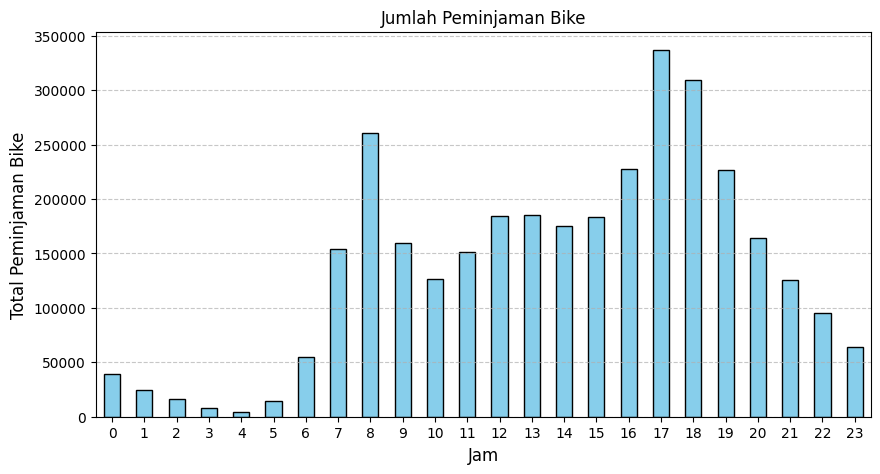

In [31]:
plt.figure(figsize=(10, 5))
hour_df.groupby("hr")["cnt"].sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Peminjaman Bike", fontsize=12)
plt.title("Jumlah Peminjaman Bike", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 2:

Bagaimana perbandingan jumlah peminjaman oleh pengguna terdaftar (registered) di banding pengguna tidak terdaftar (casual). (perbandingan registered vs casual sepanjang tahun)

In [32]:
day_df.groupby("dteday", as_index=False)[["registered", "casual"]].sum()

,dteday,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82
...,...,...,...
726,2012-12-27,1867,247
727,2012-12-28,2451,644
728,2012-12-29,1182,159
729,2012-12-30,1432,364


C:\Users\inait\AppData\Local\Temp\ipykernel_2340\4165519372.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day_df.set_index("dteday").resample("M")[["registered", "casual"]].sum().set_index(
C:\Users\inait\AppData\Local\Temp\ipykernel_2340\4165519372.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day_df.set_index("dteday").resample("M").sum().index.strftime("%Y-%m")


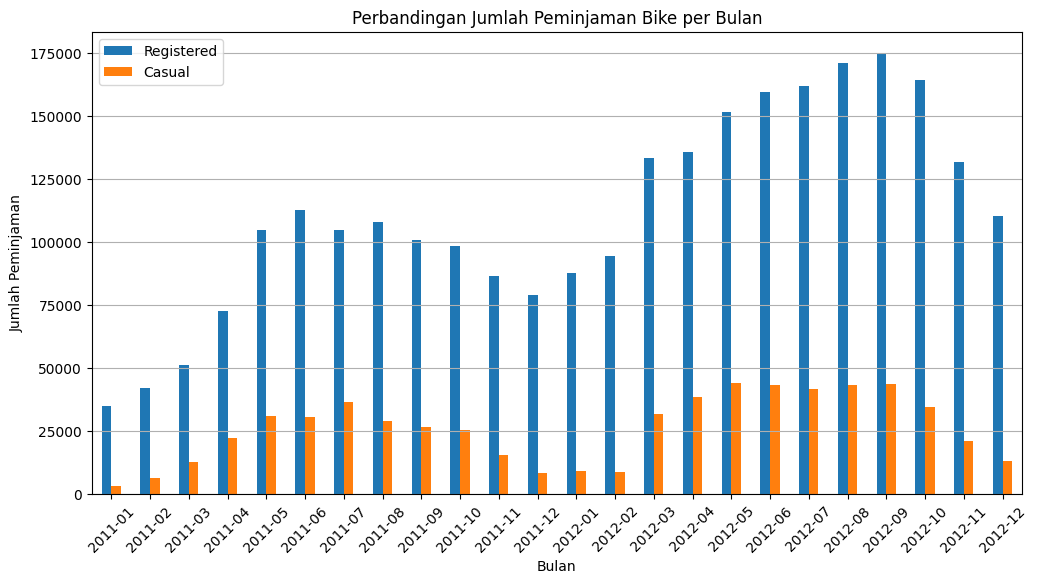

In [33]:
day_df.set_index("dteday").resample("M")[["registered", "casual"]].sum().set_index(
    day_df.set_index("dteday").resample("M").sum().index.strftime("%Y-%m")
).plot(kind="bar", figsize=(12, 6))

plt.title("Perbandingan Jumlah Peminjaman Bike per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.legend(["Registered", "Casual"])
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**Insight:**
- Dari visualisasi yang sudah ditampilkan, menggunakan diagram lebih terlihat signifikan hasil dari analisis data dan perbandingan.

## Analisis Lanjutan (Opsional)

In [34]:
#Manual Clustering Analysis pada Peminjaman sepeda berdasarkan waktu

def categorize_time(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 12 <= hour < 18:
        return "Siang"
    elif 18 <= hour < 24:
        return "Malam"
    else:
        return "Dini Hari"

hour_df["time_category"] = hour_df["hr"].apply(categorize_time)
time_category_totals = hour_df.groupby("time_category", as_index=False)["cnt"].sum()

print(time_category_totals)


  time_category      cnt
0     Dini Hari   106509
1         Malam   986109
2          Pagi   907319
3         Siang  1292742


Membuat kategori waktu untuk pengelompokan jam peminjaman : 
- PAgi (6-12)
- Siang (12-18)
- Malam (18-24)
- Dini Hari (0-6)
Kemudian dari kategori tersebut di total. Maka akan menghasilkan hasil pada grafik pie di bawah ini.

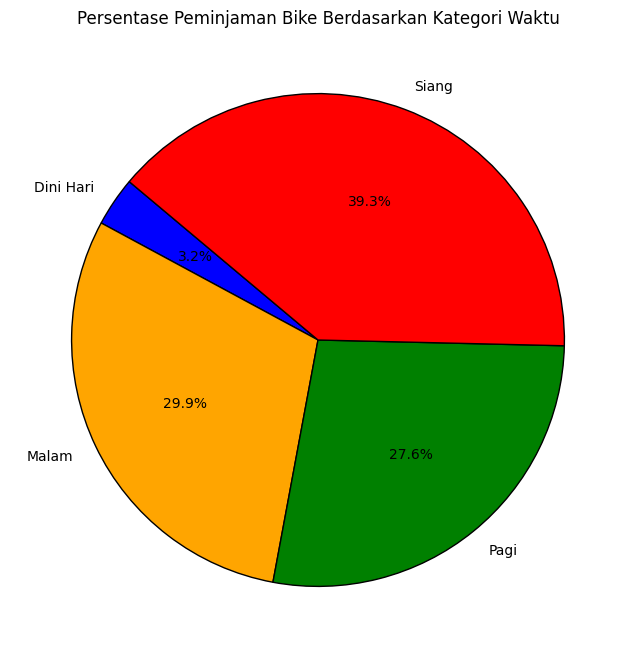

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(
    time_category_totals["cnt"], 
    labels=time_category_totals["time_category"], 
    autopct="%1.1f%%", 
    colors=["blue", "orange", "green", "red"], 
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)

plt.title("Persentase Peminjaman Bike Berdasarkan Kategori Waktu")
plt.show()

In [36]:
#RFM Analysis
current_date = day_df["dteday"].max()
rfm_df = day_df.groupby("registered").agg({
    "dteday": lambda x: (current_date - x.max()).days, 
    "instant": "count", 
    "cnt": "sum"  
}).reset_index()

rfm_df.columns = ["registered", "Recency", "Frequency", "Monetary"]

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0          20       63          1        22
1         416      704          1       431
2         432        5          1       441
3         451      372          1       754
4         472      705          1       506


C:\Users\inait\AppData\Local\Temp\ipykernel_2340\3103965350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="registered",
C:\Users\inait\AppData\Local\Temp\ipykernel_2340\3103965350.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="registered",
C:\Users\inait\AppData\Local\Temp\ipykernel_2340\3103965350.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="registered",


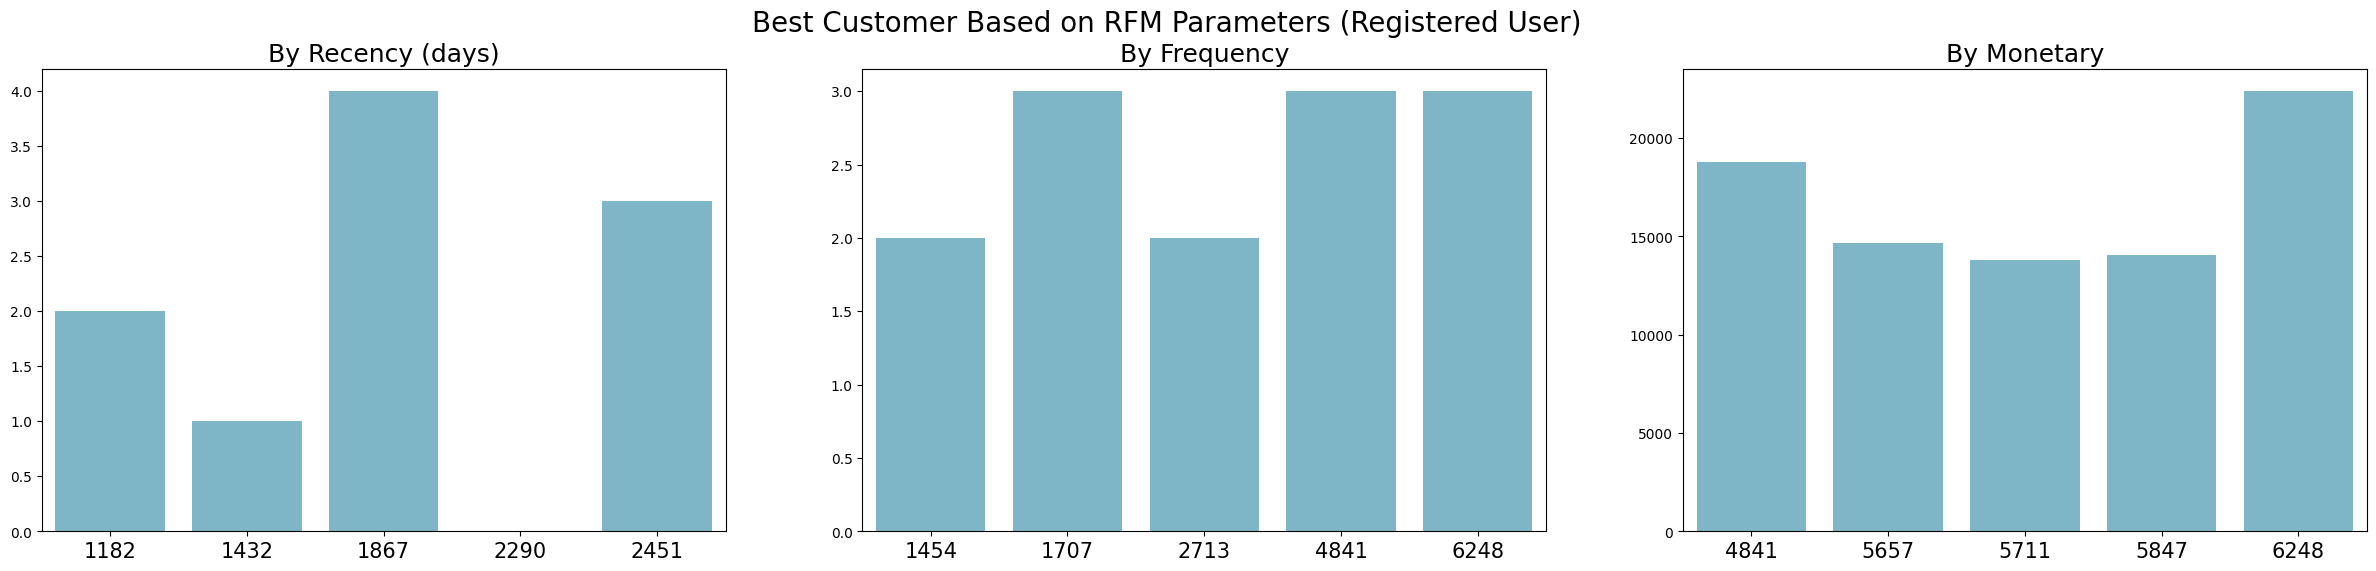

In [37]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="Recency", x="registered", 
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="Frequency", x="registered", 
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary", x="registered", 
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Registered User)", fontsize=20)

plt.show()

## Conclusion

- Conclution pertanyaan 1 : Waktu Penggunaan Sepeda Paling Tinggi dalam Sehari
Berdasarkan analisis jumlah peminjaman sepeda berdasarkan jam (hr), puncak penggunaan sepeda terjadi pada jam sibuk pagi dan sore hari. Lonjakan peminjaman terjadi sekitar pukul 07:00 - 08:00 pagi dan 17:00 - 19:00 sore, yang kemungkinan besar disebabkan oleh aktivitas berangkat dan pulang kerja atau sekolah. Sebaliknya, jumlah peminjaman cenderung rendah pada dini hari (00:00 - 06:00) karena aktivitas pengguna yang lebih sedikit.

- Conclution pertanyaan 2 : Perbandingan Jumlah Peminjaman Pengguna Terdaftar (Registered) dengan Pengguna Tidak Terdaftar (Casual)
Hasil analisis menunjukkan bahwa pengguna terdaftar (registered) secara konsisten memiliki jumlah peminjaman yang lebih tinggi dibandingkan pengguna tidak terdaftar (casual) sepanjang tahun. Peminjaman oleh pengguna terdaftar cenderung stabil dan meningkat selama hari kerja, terutama saat jam sibuk. Di sisi lain, pengguna tidak terdaftar lebih banyak meminjam sepeda pada akhir pekan dan hari libur, menunjukkan pola penggunaan yang lebih bersifat rekreasional dibandingkan fungsional.

In [38]:
#Persiapan (untuk menyimpan berkas dataset yang telah dibersihkan)
#hour_df.to_csv("clean_hour_df.csv", index=False)
#day_df.to_csv("clean_day_df.csv", index=False)